In [22]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy.optimize as opt
import math
import csv
from matplotlib import rc, rcParams


with open('pendulum.csv', mode ='r') as file:    
       # csvFile = csv.reader(file)
       csvFile = csv.DictReader(file)
       lines = [line for line in csvFile]
lines.pop(4)

means = [float(line['g (m/s2)']) for line in lines]
# means = [float(line[1]) for line in lines]
print(max(means))

## change percents into values
lines[246 - 1]["stat uncert"] = 0.02 * means[246]
lines[246 - 1]["sys uncert"] = 0.015 * means[246]
## change unbalanced values into usable symmetric uncertainty (we care about range i guess and not actual start/end values here)
lines[0]["sys uncert"] = (0.35 + 0.44)/2
lines[133 - 1]["stat uncert"] = (0.0484 + 0.00196)/2
lines[219 - 1]["total uncert"] = (0.14 + 0.37)/2

bincenters = (bins[1][1:] + bins[1][:-1]) / 2
bincounts = bins[0]
# line[]
sysdev = [float(line['sys uncert']) if line['sys uncert'] != '' else 0 for line in lines]

statdev = [float(line['stat uncert']) if line['stat uncert'] != '' else 0 for line in lines]

firsttotdev = [float(line['total uncert']) if line['total uncert'] != '' else 0 for line in lines]

# print(f"{len(means)} {len(sysdev)} {len(statdev)} {len(totdev)}")

# print(' '.join([str(j) if i == 0 else '' for j, i in enumerate(totdev)]))
totdev = [math.sqrt(sysdev[i]**2 + statdev[i]**2) if tot == 0 else tot for (i, tot) in enumerate(firsttotdev)]
print(' '.join([str(j) if i == 0 else '' for j, i in enumerate(totdev)]))
totdev
print(' '.join([str(j) if i == 0 else '' for j, i in enumerate(totdev)]))

# okay it turns out some measurements really don't have uncertainty, so we can't use them for any better calculations
# print(line[]['label'])

naivedev = math.sqrt(sum([tot**2 for tot in totdev]) / len(totdev))
print(naivedev)

bestmean = sum([mean / totdev[i]**2 if totdev[i]!=0 else 0 for i, mean in enumerate(means)])/sum([1/tot**2 if tot != 0 else 0 for tot in totdev])
print(bestmean)

bestdev = len([1 for tot in totdev if tot != 0])/sum([1/tot**2 if tot != 0 else 0 for tot in totdev])
bestdev
print(sum([1/tot**2 if tot != 0 else 0 for tot in totdev]))
trial = [(j, i) for j, i in enumerate(totdev) if i != 0]
trial.remove((192, 2.5e-05)) # don't do that if you like
print(min(trial, key = lambda t: t[1]))
print(firsttotdev[192], means[192])
print(len([1 for tot in trial])/sum([1/tot[1]**2 for tot in trial]))
print(sum([means[i] / tot**2 for i, tot in trial])/sum([1/tot**2 for i, tot in trial]))

means = [means[i] for i, tot in trial]
devs = [tot for i, tot in trial]
print(devs)

15.7
                                                       55              69 70                                                                                                                            194                                                                                                                                                                      
                                                       55              69 70                                                                                                                            194                                                                                                                                                                      
0.6550593740700272
9.748394962805582
1600435711.9436693
(23, 0.0049254441424099)
2.5e-05 9.74838
0.0008170535721418443
9.803340642568628
[0.39507119611533315, 0.26925824035672524, 0.0282842712474619, 0.13098091464026354, 0.00806225774829855, 0.47, 0.02, 0

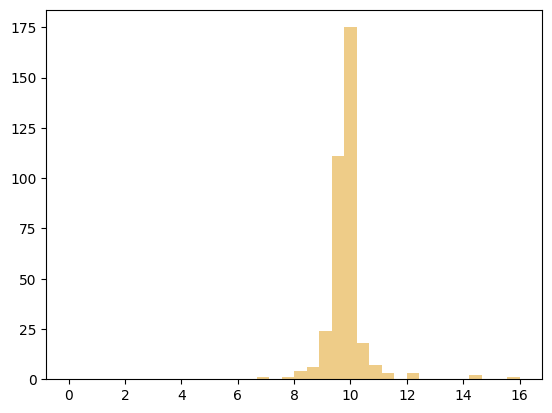

In [18]:
bins = plt.hist(means, 36, range=(0, 16), color=np.array([238,204,136]) / 255)


In [25]:
def gaussian(mean, variance):
    return 1/np.sqrt(np.pi * 2 * variance) * np.exp(-(x - mean) ** 2 / (2 * variance))
devs = np.array(devs)
print(devs.shape)
print(len(means))
print(len(bincounts))
popt, pcov = opt.curve_fit(f=gaussian, xdata=bincenters, ydata=bincounts, sigma=devs)

(356,)
356
36


ValueError: `sigma` has incorrect shape.